In [7]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization,Conv2DTranspose
from keras.models import Model
from keras.datasets import mnist
import livelossplot
loss_plot = livelossplot.PlotLossesKeras()

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train/255
X_test = X_test/255

In [9]:
#encoder
input_ = Input(shape=(28, 28, 1))
encoder_conv1 = Conv2D(16, (3,3), padding='same', activation='relu', name="encoder_conv1")(input_)
encoder_maxpooling1 = MaxPooling2D((2,2), padding='same', name="encoder_maxpooling1")(encoder_conv1)
encoder_conv2 = Conv2D(8, (3,3), padding='same', activation='relu', name="encoder_conv2")(encoder_maxpooling1)
encoder_maxpooling2 = MaxPooling2D((2,2), padding='same', name="encoder_maxpooling2")(encoder_conv2)
encoder_conv3 = Conv2D(8, (3,3), padding='same', activation='relu', name="encoder_conv3")(encoder_maxpooling2)
encoder_maxpooling3 = MaxPooling2D((2,2), padding='same', name="encoder_maxpooling3")(encoder_conv3)



#Decoder
decoder_conv1 = Conv2D(8, (3,3), padding='same', activation='relu', name="decoder_conv1")(encoder_maxpooling3)
decoder_upsampling1 = UpSampling2D((2,2), name="decoder_upsampling1")(decoder_conv1)
decoder_conv2 = Conv2D(8, (3,3), padding='same', activation='relu', name="decoder_conv2")(decoder_upsampling1)
decoder_upsampling2 = UpSampling2D((2,2), name="decoder_upsampling2")(decoder_conv2)
decoder_conv3 = Conv2D(8, (3,3), activation='relu', name="decoder_conv3")(decoder_upsampling2)
decoder_upsampling3 = UpSampling2D((2,2), name="decoder_upsampling3")(decoder_conv3)
decoder_conv4 = Conv2D(1, (3,3), padding='same', activation='relu', name="decoder_conv4")(decoder_upsampling3)
Autoencoder = Model(input_, decoder_conv4)

In [10]:
Autoencoder.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_conv1 (Conv2D)               │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_maxpooling1 (MaxPooling2D)   │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_conv2 (Conv2D)               │ (None, 14, 14, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_maxpooling2 (MaxPooling2D)   │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_conv3 (Conv2D)               │ (None, 7, 7, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_maxpooling3 (MaxPooling2D)   │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_conv1 (Conv2D)               │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_upsampling1 (UpSampling2D)   │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_conv2 (Conv2D)               │ (None, 8, 8, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_upsampling2 (UpSampling2D)   │ (None, 16, 16, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_conv3 (Conv2D)               │ (None, 14, 14, 8)           │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_upsampling3 (UpSampling2D)   │ (None, 28, 28, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_conv4 (Conv2D)               │ (None, 28, 28, 1)           │              73 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,729 (14.57 KB)

 Trainable params: 3,729 (14.57 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
encoder = Model(input_, encoder_maxpooling3)
input__ = Input(shape=(4, 4, 8))
decoder = Model(Autoencoder.layers[-8](input__), decoder_conv4)

In [12]:
encoder.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_conv1 (Conv2D)               │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_maxpooling1 (MaxPooling2D)   │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_conv2 (Conv2D)               │ (None, 14, 14, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_maxpooling2 (MaxPooling2D)   │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_conv3 (Conv2D)               │ (None, 7, 7, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_maxpooling3 (MaxPooling2D)   │ (None, 2, 2, 8)             │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,904 (7.44 KB)

 Trainable params: 1,904 (7.44 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
decoder.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ keras_tensor_31CLONE (InputLayer)    │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_conv1 (Conv2D)               │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_upsampling1 (UpSampling2D)   │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_conv2 (Conv2D)               │ (None, 8, 8, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_upsampling2 (UpSampling2D)   │ (None, 16, 16, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_conv3 (Conv2D)               │ (None, 14, 14, 8)           │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_upsampling3 (UpSampling2D)   │ (None, 28, 28, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_conv4 (Conv2D)               │ (None, 28, 28, 1)           │              73 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,825 (7.13 KB)

 Trainable params: 1,825 (7.13 KB)

 Non-trainable params: 0 (0.00 B)

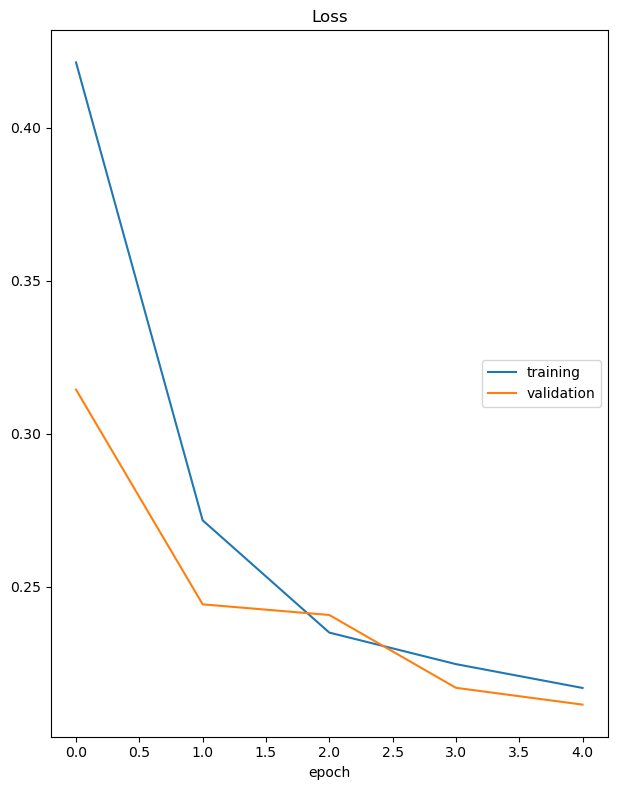

Loss
	training         	 (min:    0.217, max:    0.421, cur:    0.217)
	validation       	 (min:    0.212, max:    0.314, cur:    0.212)


In [17]:
Autoencoder.compile(optimizer='adam',
         loss='binary_crossentropy')
epoch=5
Autoencoder.fit(X_train, X_train,
               epochs=epoch,
               batch_size=1000,
                callbacks=[loss_plot],
               validation_data=(X_test, X_test),
               verbose=0)

In [18]:
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


ValueError: Input 0 of layer "functional_11" is incompatible with the layer: expected shape=(None, 2, 2, 8), found shape=(32, 4, 4, 8)

In [ ]:
import matplotlib.pyplot as plt
n = 10
for i in range(0, n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_test[i], cmap="gray")
    ax = plt.subplot(2, n, i+n+1)
    plt.imshow(decoded_imgs[i], cmap="gray")
plt.show()